In [13]:
import copulagp.bvcopula as bvcopula
import copulagp.utils as utils

path = f'../../plos_fig5_data/'

import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.ticker import FormatStrFormatter
from matplotlib import collections  as mc

# R^2

In [14]:
# pre-computed
[R1,R2] = [[0.9860019722068722, 0.9729762509342, 0.9448647468109408, 0.9821123175158591],
 [0.9885824997929535,
  0.983195342980131,
  0.9834448477631075,
  0.9790247773014025]]

In [15]:
animal = 'ST260'
day_name = 'Day1'
exp_pref = f'{animal}_{day_name}'
with open(f"{path}/{exp_pref}_signals.pkl",'rb') as f:
    signal_pkl = pkl.load(f)
with open(f"{path}/{exp_pref}_behaviour.pkl",'rb') as f:
    behaviour_pkl = pkl.load(f)
for s in ['trialStart','maxTrialNum','trials']:
    assert(np.allclose(signal_pkl[s],behaviour_pkl[s]))

[26. 27. 28. 29. 30. 31. 32. 33. 34. 35.]


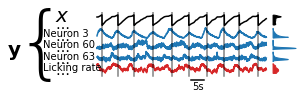

In [16]:
from scipy.stats import gaussian_kde
from matplotlib.patches import Polygon

fig = plt.figure(figsize = (4,1))

mask = np.arange(5000,6500)
def normalise(signal):
    return (signal - signal.min())/(signal.max() - signal.min())

def plot_trace(ax,x,signal,mask,shift,c='C0'):
    ax.plot(x,normalise(signal[mask])*1.6-0.3+shift,color=c)
    kde = gaussian_kde(normalise(signal))
    t = np.linspace(0,1,1000)
    y = np.concatenate(([0],kde(t),[0]))
    y = 1000*20*y/y.sum()
    t = np.concatenate(([0],t,[1]))*1.5-0.25
    pl = Polygon(np.stack([x.max()+40+y,t+shift],axis=-1),True,color=c)
    ax.add_patch(pl)

def plot_all_traces(ax):

    x = (mask-5000)/1.5+500
    plot_trace(ax,x,signal_pkl['signals_fissa'][3],mask,5.2)
    plot_trace(ax,x,signal_pkl['signals_fissa'][60],mask,3.4)
    plot_trace(ax,x,signal_pkl['signals_fissa'][63],mask,1.6)
    plot_trace(ax,x,behaviour_pkl['fat_licks'],mask,-.2,c='C3')
    
    plot_trace(ax,x,behaviour_pkl['position'],mask,7.2,c='k')

    trials = behaviour_pkl['trials'][mask]
    print(trials[1:][trials[1:] - trials[:-1] == 1]) #next
    pos_change = np.arange(len(trials[:-1]))[trials[1:] - trials[:-1]==1]
    for p in pos_change:
        plt.axvline(p/1.5+500, ymin=0.1, color='k',alpha=0.5)
    
    x = (mask[830:830+24*5]-5000)/1.5+500
    ax.plot(x,x*0-1.5,color='k')
    ax.text(x[15],-2.8,'5s')
    
    ax.text(-30,2.3,'$\mathbf{y}$',fontsize=20)
    ax.text(20,0.4,'{',fontsize=80,fontweight='ultralight')
    ax.text(250,7.5,'$x$',fontsize=20)
    
    ax.text(180,5.3,'Neuron 3')
    ax.text(180,3.5,'Neuron 60')
    ax.text(180,1.8,'Neuron 63')
    ax.text(180,0.1,'Licking rate')
    for i in [-0.6,1.15,2.9,4.65,6.4]:
        ax.text(250,i,'$\ldots$',fontsize=14)
        
    ax.set_xlim(0,1700)
    
ax = fig.add_axes([0,0,1,1])
ax.axis("off")
plot_all_traces(ax)

In [17]:
with open(f"{path}/HYgX_subpop_D1C.pkl","rb") as f:
    dataC = pkl.load(f)
with open(f"{path}/HYgX_subpop_D1UxFC.pkl","rb") as f:
    dataU = pkl.load(f)
    
# Load single variable (MI,H(Y|X)) for 109 neuronal and behavioral variables, precalculated with BI_KSG:
with open(f"{path}/singleH.pkl","rb") as f:
    singleH = pkl.load(f)
    
eI = [U.mean()-C.mean() for U,C,s in zip(dataU[2],dataC[2],np.cumsum(singleH)[dataC[0]-1])]

/home/nina/.envs/GPyTorch_new/lib/python3.6/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/home/nina/.envs/GPyTorch_new/lib/python3.6/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


[26. 27. 28. 29. 30. 31. 32. 33. 34. 35.]


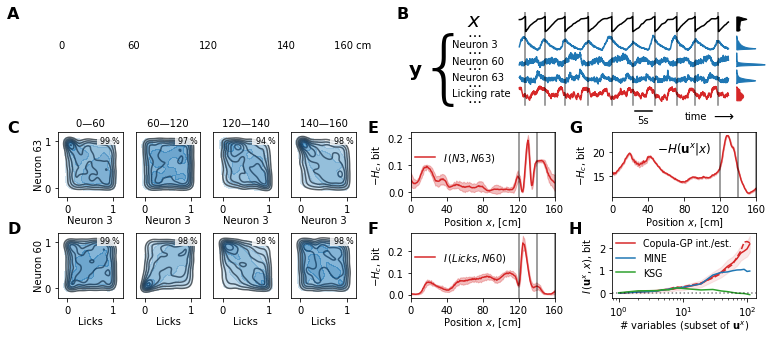

In [21]:
# fig, (trunc,subpop,Hrs) = plt.subplots(1,3,figsize=(15,2))
interval_ends = [0,60,120,140,160]

fig_width, fig_height = 10.2, 4.5
aspect = fig_width/fig_height
fig = plt.figure(figsize=(fig_width,fig_height))

l_mrg, b_mrg = 0.5/fig_width, aspect*0.4/fig_width
block_size = 2.8/fig_width
dens_size = .9/fig_width
plot_width, plot_height = 2.0/fig_width, dens_size*aspect
dens_y = b_mrg# + 1.4/fig_height
dens_blockX = dens_size*1.2
dens_blockY = 1.4/fig_height
MI_shift = 1.75*block_size

# ax0 = fig.add_axes([0,0,1,1])

def plot_exp(fig,n1,n2,R,n,label):
        
    with open(f"{path}/ex_{n1}_{n2}_serialized.pkl","rb") as f:
        data = pkl.load(f)
        
    name1, name2 = f"Neuron {data['n1']}", f"Neuron {data['n2']}"
    if n1==-2:
        name1 = 'Licks'
    
    ax_list = []
    for i in range(4):
        ax_list.append(fig.add_axes([l_mrg+i*dens_blockX,dens_y+dens_blockY*n,dens_size,dens_size*aspect]))
        if i>0:
            ax_list[-1].set_yticks([],[])
    utils.Plot_Copula_Density(np.array(ax_list), data['Xs'].squeeze()*160, data['Ys'].squeeze(), 
                              interval_ends, shade=True)
    utils.Plot_Copula_Density(np.array(ax_list), data['X'].squeeze()*160, data['Y'], 
                              interval_ends, shade=False, color='#073763ff')

    titles = ["{}⁠—{}".format(s,e) for s,e in zip(interval_ends[:-1],interval_ends[1:])]
    for i in range(4):
        if n!=1:
            ax_list[i].set_title('')
        else:
            ax_list[i].set_title(titles[i],fontsize=10)
        ax_list[i].set_xlabel(name1,labelpad=1,fontsize=10)
        ax_list[i].text(0.65,0.97,f' ${R[i]*100:.0f}\,\%$', fontsize=8,
                        bbox={'facecolor':'white', 'edgecolor':'none', 'alpha':0.8, 'pad':0.3})
    ax_list[0].set_ylabel(name2,labelpad=1,fontsize=10)
    
    ax_list[0].xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax_list[0].yaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax_list[0].set_yticks([0,1],minor=False)
    ax_list[0].set_yticklabels([0,1])

    MI = fig.add_axes([l_mrg + MI_shift,dens_y+dens_blockY*n,plot_width,plot_height])
    MI.plot(data["MI"][0],data["MI"][1],color='C3', label = label)
    MI.fill_between(data["MI"][0],(data["MI"][1]-data["MI"][2]),
                     (data["MI"][1]+data["MI"][2]),
                     alpha=0.3,color='C3')
    
    MI.set_xlabel('Position $x$, [cm]',labelpad=1)
    for x in [120,140,160]:
        MI.axvline(x, color='black', alpha=0.5)
    MI.set_ylabel('$-H_c$, bit')
    MI.set_xlim(0,160)
    MI.set_xticks(np.arange(0,161,40),minor=False)
    MI.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    MI.legend(fontsize = 10, frameon=False,loc=(0,0.45))
    
# plot_exp(fig,14,23,2)
plot_exp(fig,3,63,R1,1,"$I\,(N3, N63)$")
plot_exp(fig,-2,60,R2,0,"$I\,(Licks, N60)$")

##################################################################

fig.text(2.435*dens_blockX,dens_y+2*dens_blockY+0.22*plot_height,"   Reward",fontsize=12, color='white')
# fig.text(3.45*dens_blockX,dens_y+2*dens_blockY+0.1*plot_height,"   Late\n reward",fontsize=14, color='white')
fig.text(-0.02,dens_y+2*dens_blockY+plot_height*1.2,"A",fontsize=16,fontweight='bold')
fig.text(MI_shift+0.03,dens_y+2*dens_blockY+plot_height*1.2,"B",fontsize=16,fontweight='bold')
fig.text(-0.02,dens_y+dens_blockY+plot_height,"C",fontsize=16,fontweight='bold')
fig.text(-0.02,dens_y+plot_height,"D",fontsize=16,fontweight='bold')

fig.text(l_mrg,dens_y+1.83*dens_blockY+plot_height,'0')
fig.text(l_mrg+1*dens_blockX-0.012,dens_y+1.83*dens_blockY+plot_height,'60')
fig.text(l_mrg+2*dens_blockX-0.02,dens_y+1.83*dens_blockY+plot_height,'120')
fig.text(l_mrg+3*dens_blockX-0.02,dens_y+1.83*dens_blockY+plot_height,'140')
fig.text(l_mrg+4*dens_blockX-0.048,dens_y+1.83*dens_blockY+plot_height,'160 cm')

all_shift = MI_shift+1.0*block_size

# fig.text(all_shift+0.05*plot_width,dens_y+dens_blockY+plot_height*2.75,'Trials 25-35',fontsize="12")
fig.text(all_shift+0.75*plot_width,dens_y+dens_blockY+plot_height*1.20,'time',fontsize="10")
fig.text(all_shift+0.95*plot_width,dens_y+dens_blockY+plot_height*1.18,'⟶',fontsize="14")

####################################################################

traces =    fig.add_axes([l_mrg + MI_shift+0.02*block_size,b_mrg+2*dens_blockY-plot_height*0.3,
                          plot_width+1.05*block_size,plot_height*1.6])
traces.axis('off')
plot_all_traces(traces)

####################################################################

fig.text(MI_shift-0.01,dens_y+dens_blockY+plot_height,"E",fontsize=16,fontweight='bold')
fig.text(MI_shift-0.01,b_mrg+plot_height,"F",fontsize=16,fontweight='bold')
fig.text(all_shift-0.01,dens_y+dens_blockY+plot_height,"G",fontsize=16,fontweight='bold')
fig.text(all_shift-0.01,b_mrg+plot_height,"H",fontsize=16,fontweight='bold')

Hrs = fig.add_axes([l_mrg + all_shift,b_mrg+dens_blockY,plot_width,plot_height])
subpop =    fig.add_axes([l_mrg + all_shift,b_mrg,plot_width,plot_height])

with open(f"{path}/MI_subpopulations_conditional.pkl","rb") as f:
    [Ns,_,I] = pkl.load(f)
subpop.semilogx(Ns,[i[0] for i in I],color='C3', label='Copula-GP int./est.')
subpop.semilogx(Ns,[i for i in eI],color='C3',linestyle='dashed')
subpop.fill_between(Ns,[i[0]+i[1] for i in I],[i[0]-i[1] for i in I],color='C3',alpha=0.1)
with open(f"{path}/MI_subpopulations_MINE_conditional.pkl","rb") as f:
    [Ns,I] = pkl.load(f)
subpop.semilogx(Ns,I,color='C0', label = 'MINE')
with open(f"{path}/MI_subpopulations_KSG_conditional.pkl","rb") as f:
    [Ns,I] = pkl.load(f)
subpop.semilogx(Ns,[i[0] for i in I],color='C2', label = 'KSG')
subpop.axhline(0,color='k',alpha=0.5,linestyle='dotted')
subpop.set_xlabel('# variables (subset of $\mathbf{u}^x$)',labelpad=0)
subpop.set_ylabel('$I\,(\mathbf{u}^x,x)$, bit')
subpop.legend(frameon=False,loc=(0,0.25),fontsize=9.5)

with open(f"{path}/HYgX_109V_all.pkl","rb") as f:
    [_,xCs,HCs] = pkl.load(f)
Hrs.plot(xCs*160,-np.array(HCs).mean(0).squeeze(),color='C3')
Hrs.fill_between(xCs*160,-np.array(HCs).mean(0).squeeze()+np.array(HCs).std(0).squeeze(),
                 -np.array(HCs).mean(0).squeeze()-np.array(HCs).std(0).squeeze(),color='C3',alpha=0.3)


for x in [120,140,160]:
    Hrs.axvline(x, color='black', alpha=0.5)

Hrs.set_xlabel('Position $x$, [cm]',labelpad=1)
Hrs.set_ylabel('$-H_c$, bit')
Hrs.set_xlim(0,160)
Hrs.set_xticks(np.arange(0,161,40),minor=False)
Hrs.xaxis.set_major_formatter(FormatStrFormatter('%d'))
Hrs.set_title("$-H(\mathbf{u}^x|x)$",y=0.6)

fig.savefig(f'../../results/plots.svg', transparent=True)

# A figure about 17 dimensions

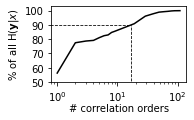

In [20]:
fig = plt.figure(figsize=(2.5,1.5))
trunc = fig.add_axes([0.245,0.28,0.75,0.70])
with open(f"{path}/HYgX_trunc_D1C.pkl","rb") as f:
    [NsC,xC,HC] = pkl.load(f)
Ns = 109-NsC
Hs = singleH.sum(0)[0]
trunc.semilogx(Ns[:],[100*(H.mean()-Hs)/(HC[0].mean()-Hs) for H in HC[:]],color='k')
# print([100*(H.mean()-Hs)/(HC[0].mean()-Hs) for H in HC[:]])
lines = [[(0, 90), (17, 90)], [(17, 0), (17, 90)]]
lc = mc.LineCollection(lines, colors='k', linestyle='dashed', linewidths=0.8)
trunc.add_collection(lc)
trunc.set_xlabel('# correlation orders',labelpad=0)
trunc.set_ylabel('% of all H($\mathbf{y}|x$)')
trunc.set_ylim(50,103)
trunc.set_yticks([50,60,70,80,90,100]);
fig.savefig(f"../../results/corr_order.pdf")